# Hossein Baghdadi
# Naive Bayes Project with scikit-learn

# Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# Load Dataset

In [2]:
data = pd.read_csv('train+dev+test.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data['veil-type'].unique()

array(['p'], dtype=object)

In [7]:
data.drop(['veil-type'], axis=1, inplace=True)

# Missing Values

In [8]:
# data.isna().sum()

In [9]:
data['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [10]:
data['stalk-root'] = data['stalk-root'].replace(['?'], data['stalk-root'].mode())

In [11]:
data['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

# OrdinalEncoder & LabelEncoder for our categorical dataset

In [12]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [13]:
oe = preprocessing.OrdinalEncoder(dtype='int')
oe_fitted = oe.fit(data[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']])
oe_fitted

OrdinalEncoder(dtype='int')

In [14]:
data[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']] = oe_fitted.transform(data[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']])

In [15]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,e,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,e,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,p,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,e,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [16]:
le = preprocessing.LabelEncoder()
le_fitted = le.fit(data['class'])
le_fitted

LabelEncoder()

In [17]:
data['class'] = le_fitted.transform(data['class'])

In [18]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


# Heatmap

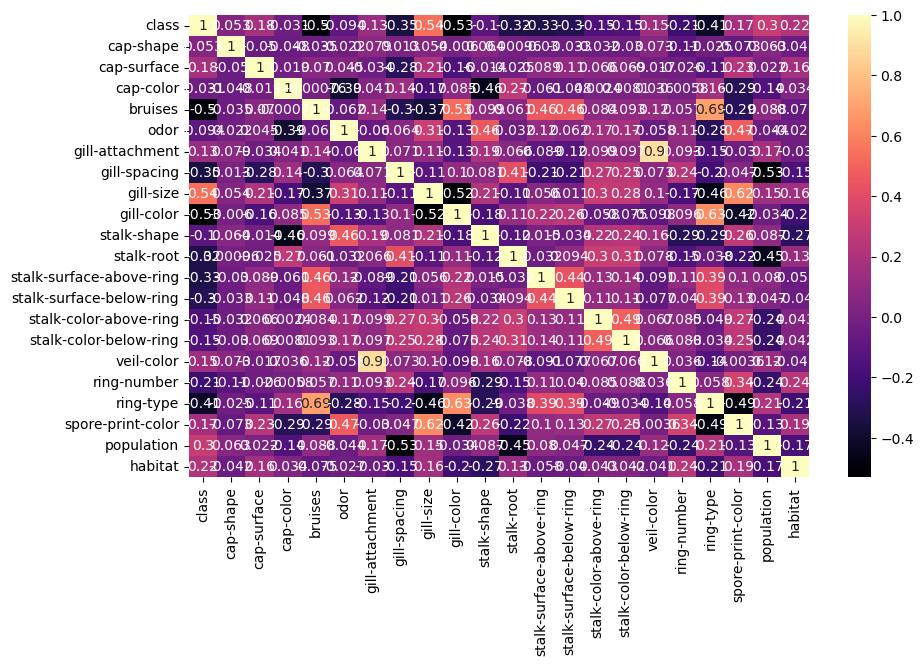

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='magma');

# Feature Set

In [20]:
X = data[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']].values
X[0:5]

array([[5, 2, 4, 1, 6, 1, 0, 1, 4, 0, 2, 2, 2, 7, 7, 2, 1, 4, 2, 3, 5],
       [5, 2, 9, 1, 0, 1, 0, 0, 4, 0, 1, 2, 2, 7, 7, 2, 1, 4, 3, 2, 1],
       [0, 2, 8, 1, 3, 1, 0, 0, 5, 0, 1, 2, 2, 7, 7, 2, 1, 4, 3, 2, 3],
       [5, 3, 8, 1, 6, 1, 0, 1, 5, 0, 2, 2, 2, 7, 7, 2, 1, 4, 2, 3, 5],
       [5, 2, 3, 0, 5, 1, 1, 0, 4, 1, 2, 2, 2, 7, 7, 2, 1, 0, 3, 0, 1]])

In [21]:
y = data['class'].values
y[0:5]

array([1, 0, 0, 1, 0])

# Train & Test Set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Size of Train set:", X_train.shape, y_train.shape)
print("Size of Test set:", X_test.shape, y_test.shape)

Size of Train set: (6499, 21) (6499,)
Size of Test set: (1625, 21) (1625,)


# Naive Bayes Classifier

In [23]:
model = GaussianNB()
model = model.fit(X_train, y_train)
model

GaussianNB()

In [24]:
ypred = model.predict(X_test)
print(ypred[0:5])
print(y_test[0:5])

[0 1 1 0 1]
[0 1 1 0 1]


# Accuracy

In [25]:
print('Train set Accuracy :', accuracy_score(y_train, model.predict(X_train)) * 100)
acc = print('Test set Accuracy :', accuracy_score(y_test, ypred) * 100)

Train set Accuracy : 90.07539621480227
Test set Accuracy : 90.64615384615384


# Classification Report

In [26]:
rp = classification_report(y_test, ypred)
print(rp)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       845
           1       0.90      0.90      0.90       780

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625



# Roc Curve & Auc Score

In [27]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, ypred)

In [28]:
print('roc_auc_score for Naive Bayes: ', roc_auc_score(y_test, ypred))

roc_auc_score for Naive Bayes:  0.906360946745562


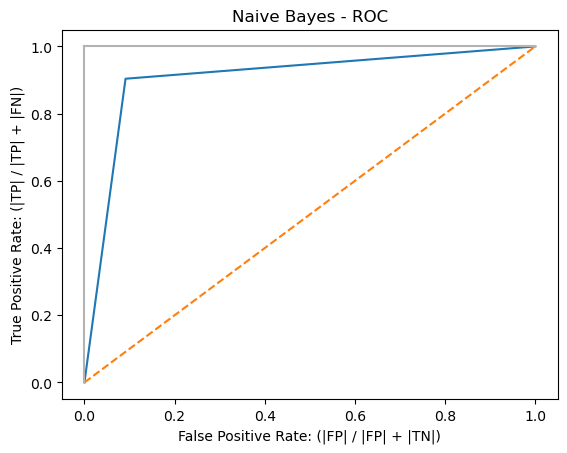

In [29]:
plt.title('Naive Bayes - ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate: (|TP| / |TP| + |FN|)')
plt.xlabel('False Positive Rate: (|FP| / |FP| + |TN|)')
plt.show()